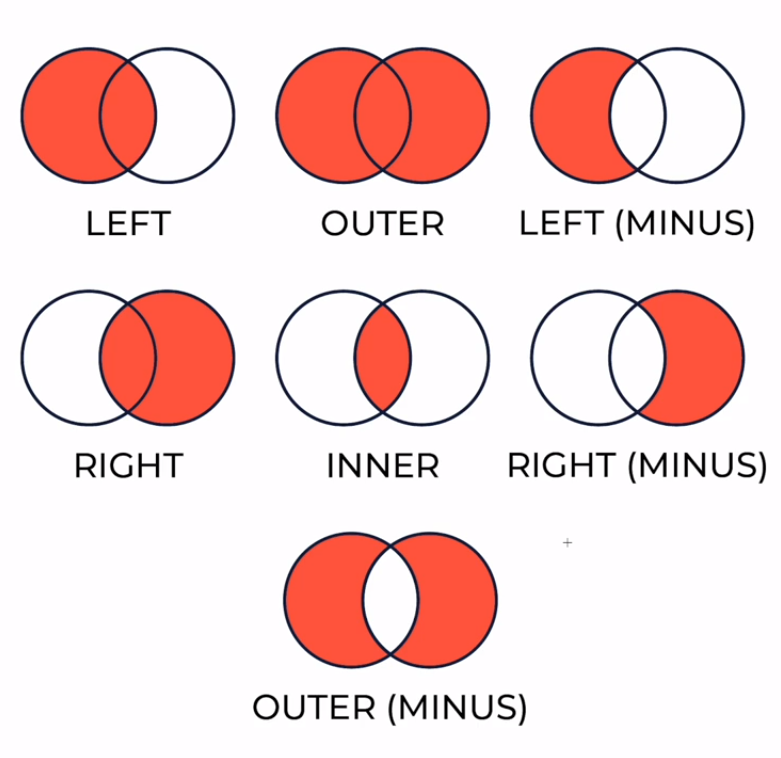

In [10]:
import pandas as pd

`merge()`
* Merges a dataset with the database-style join (as above diagram).

In [11]:
company21 = pd.read_csv("company21.csv", sep=';')
company21

,ID,Name,Age,Job,Gender,Salary
0,1,Ethan,20,PR,Male,20000
1,2,Olivia,24,Project Manager,Female,30000
2,3,Liam,41,Marketer,Male,40000
3,4,Emma,23,PR,Female,20000
4,5,Benjamin,44,Marketer,Male,10000
5,6,Ava,50,Data Analyst,Female,100000
6,7,Alexander,22,PR,Male,20000
7,8,James,18,Project Manager,Male,40000
8,9,Isabella,19,Project Manager,Female,40000
9,10,Mark,25,Data Analyst,Male,120000


In [12]:
company22 = pd.read_csv("company22.csv", sep=';')
company22

,ID,Name,Age,Job,Gender,Salary
0,1,Ethan,20,PR,Male,30000
1,2,Olivia,24,Project Manager,Female,25000
2,3,Liam,41,Marketer,Male,40000
3,4,Robert,55,PR,Male,20000
4,5,Benjamin,44,Marketer,Male,10000
5,6,Maria,30,Data Analyst,Female,150000
6,7,Federico,25,Project Manager,Male,150000
7,8,James,18,Project Manager,Male,50000
8,9,Isabella,19,Project Manager,Female,40000
9,10,Mark,25,Data Analyst,Male,120000


Noticing - in both datasets we have a bit different data, 
like Ava is present in company21 df but not in company22.
Also there is new name Philip in company22

In [13]:
# lets just select Name and Salary.
cols = ["Name", "Salary"]
company21 = pd.read_csv(
    "company21.csv", 
    sep=';',
    usecols=cols
    )
company22 = pd.read_csv(
    "company22.csv", 
    sep=';',
    usecols=cols
    )

In [14]:
company21

,Name,Salary
0,Ethan,20000
1,Olivia,30000
2,Liam,40000
3,Emma,20000
4,Benjamin,10000
5,Ava,100000
6,Alexander,20000
7,James,40000
8,Isabella,40000
9,Mark,120000


In [15]:
company22

,Name,Salary
0,Ethan,30000
1,Olivia,25000
2,Liam,40000
3,Robert,20000
4,Benjamin,10000
5,Maria,150000
6,Federico,150000
7,James,50000
8,Isabella,40000
9,Mark,120000


Merging
* `outer` will join everything

In [18]:
pd.merge(
    left=company21, # put df which is going to be on left side
    right=company22, # put df which is going to be on left side right side
    how='outer', # Join method, by default it is inner
    on="Name", # Column name on which we want to perform operation
)

,Name,Salary_x,Salary_y
0,Ethan,20000.0,30000.0
1,Olivia,30000.0,25000.0
2,Liam,40000.0,40000.0
3,Emma,20000.0,NaN
4,Benjamin,10000.0,10000.0
5,Ava,100000.0,NaN
6,Alexander,20000.0,NaN
7,James,40000.0,50000.0
8,Isabella,40000.0,40000.0
9,Mark,120000.0,120000.0


So, we just combined all the data.

But on noticing - now we have Salary_x and Salary_y as a column, and this name
doesn't exists in original df, instead we had Salary column,
so to as I noticed company21 is of year 21 data and company22 is of year 22,
so we can name like that

Now, lets try to label these column names

In [19]:
pd.merge(
    left=company21, 
    right=company22, 
    how='outer', 
    on="Name", 
    suffixes=('_21', '_22') # suffix - so column ends with these values present in tuple, respectively.
)

,Name,Salary_21,Salary_22
0,Ethan,20000.0,30000.0
1,Olivia,30000.0,25000.0
2,Liam,40000.0,40000.0
3,Emma,20000.0,NaN
4,Benjamin,10000.0,10000.0
5,Ava,100000.0,NaN
6,Alexander,20000.0,NaN
7,James,40000.0,50000.0
8,Isabella,40000.0,40000.0
9,Mark,120000.0,120000.0


In [21]:
pd.merge(
    left=company21,
    right=company22,
    how='outer', 
    on="Name", 
    suffixes=('_21', '_22'),
    indicator=True # setting up indicator, which is False by default - this tells how two datasets were merged
)

"""
if merge column has value -
both - means value was present in both of the datasets
left_only - value was present in left df only
right_only - value was present in right df only
"""

,Name,Salary_21,Salary_22,_merge
0,Ethan,20000.0,30000.0,both
1,Olivia,30000.0,25000.0,both
2,Liam,40000.0,40000.0,both
3,Emma,20000.0,NaN,left_only
4,Benjamin,10000.0,10000.0,both
5,Ava,100000.0,NaN,left_only
6,Alexander,20000.0,NaN,left_only
7,James,40000.0,50000.0,both
8,Isabella,40000.0,40000.0,both
9,Mark,120000.0,120000.0,both
